In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.special import boxcox,boxcox1p, inv_boxcox

for durbin-watson 1.5-2.5 is normal

In [54]:
df = pd.read_csv('Boston.csv',index_col=0)

In [55]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Full Model

In [56]:
x = df.iloc[:,0:13]
y = df.iloc[:,[13]]

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=100)

In [71]:
x_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
380,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78
312,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.98
158,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59
245,0.20608,22.0,5.86,0,0.431,5.593,76.5,7.9549,7,330,19.1,372.49,12.50
57,0.02055,85.0,0.74,0,0.410,6.383,35.7,9.1876,2,313,17.3,396.90,5.77


In [58]:
model_full_lm = LinearRegression().fit(x_train,y_train)

In [59]:
model_full_lm.coef_

array([[-8.14896492e-02,  4.80407782e-02, -5.47150249e-03,
         3.06260576e+00, -1.61368815e+01,  3.67245067e+00,
        -8.51525259e-03, -1.51740854e+00,  2.87271007e-01,
        -1.21207598e-02, -9.24160757e-01,  9.53460812e-03,
        -4.85895548e-01]])

In [60]:
model_full_lm.rank_

13

In [61]:
fitted = model_full_lm.predict(x_train)

In [62]:
residual = np.array(fitted) - np.array(y_train)

In [63]:
residual[1:5]

array([[ 4.70189827],
       [-8.914648  ],
       [-1.55799061],
       [ 0.06473869]])

In [64]:
pred = model_full_lm.predict(x_test)

In [65]:
residual_test = np.array(pred) - np.array(y_test)

In [66]:
residual_test[1:5]

array([[-0.31475374],
       [ 1.71286141],
       [ 3.38613877],
       [ 4.23572131]])

In [67]:
r2_score(y_train,fitted)

0.7337332767917557

In [68]:
r2_score(y_test,pred)

0.7555033086871299

## Tests for linear regression

#### Residual plot

<AxesSubplot:>

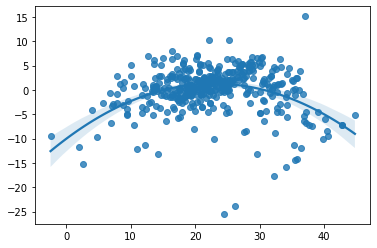

In [69]:
sns.regplot(x = fitted,y = residual,order=2)

The curve shows that the data is not linear

In [70]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9052581191062927, pvalue=3.4911509006775848e-15)

p-value of shapiro test less than 0.05, meaning the residuals do not follow normal distribution

#### QQ plot

In [ ]:
import pylab
stats.probplot(residual,dist = 'norm',plot = pylab)
pylab.show()

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

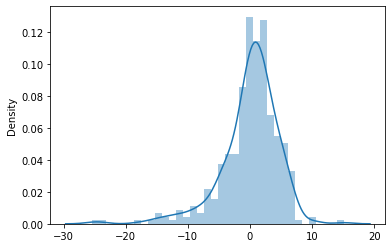

In [81]:
sns.distplot(residual)

In [82]:
stats.skew(residual)

array([-1.45158328])

In [83]:
stats.kurtosis(residual)

array([4.72169203])

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

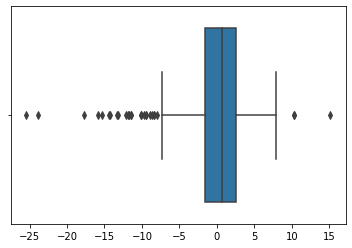

In [84]:
sns.boxplot(residual)

#### Testing for autocorrelation

In [91]:
durbin_watson(residual)

array([2.02902141])

The results for Durbin-Watson test is between 1.5 to 2.5 which means no autocorrelation

#### Heteroskedascity

In [93]:
het_breuschpagan(residual,x_train)

(94.52162545397992,
 6.540681130805439e-15,
 9.186165792861688,
 1.3284427708710318e-16)

The p-value of bptest is less than 0.05 which infers that the model has heteroskedascity

1. stat
2. P-value
3. Fcalc
4. Ftab

In [97]:
df_log = df.apply(lambda x: boxcox1p(x,0.0))

In [99]:
x,y=df_log.iloc[:,0:13],df_log.iloc[:,[13]]

In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=100)

In [101]:
model_log = LinearRegression().fit(x_train,y_train)

In [102]:
fitted_log = model_log.predict(x_train)

In [105]:
residual_log = np.array(fitted_log) - np.array(y_train)

In [104]:
r2_score(y_train,fitted_log)

0.796166619775725

In [106]:
pred_log = model_log.predict(x_test)

In [107]:
residual_test_log = np.array(pred_log) - np.array(y_test)

In [109]:
r2_score(y_test,pred_log)

0.7979312627950955

<AxesSubplot:>

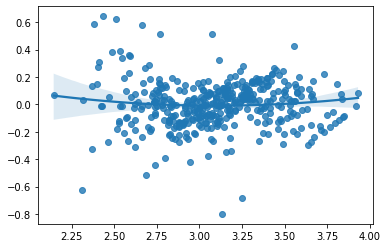

In [110]:
sns.regplot(x = fitted_log,y = residual_log,order=2)

stats.probplot(residual_test_log,dist='norm',plot=pylab)
<br>pylab.show()

In [118]:
stats.skew(residual_log)

array([-0.09940116])

In [119]:
stats.kurtosis(residual_log)

array([2.9139164])

In [120]:
stats.shapiro(residual_log)

ShapiroResult(statistic=0.9611989259719849, pvalue=7.583791372667292e-09)

According to shapiro wilk test the residuals do not follow normal distribution

In [122]:
durbin_watson(residual_log)

array([1.90231739])

There's no autocorrelation

In [121]:
het_breuschpagan(residual_log,x_train)

(124.93540605033803,
 6.387278600805559e-21,
 13.465243097223503,
 9.850923497253273e-25)

P-value less than 0.05 hence there's heteroskedascity

## Square root transformation

In [123]:
df_sqrt = df.apply(lambda x: boxcox1p(x,0.5))

In [124]:
x,y = df_sqrt.iloc[:,0:13],df_sqrt.iloc[:,[13]]

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=100)

In [126]:
model_sqrt = LinearRegression().fit(x_train,y_train)

In [128]:
fitted_sqrt = model_sqrt.predict(x_train)

In [129]:
resid_sqrt = np.array(fitted_sqrt) - np.array(y_train)

In [130]:
pred_sqrt = model_sqrt.predict(x_test)

In [131]:
resid_test_sqrt = np.array(pred_sqrt) - np.array(y_test)

In [134]:
r2_score(y_train,fitted_sqrt)

0.7931055959153699

In [133]:
r2_score(y_test,pred_sqrt)

0.8072599170960143

<AxesSubplot:>

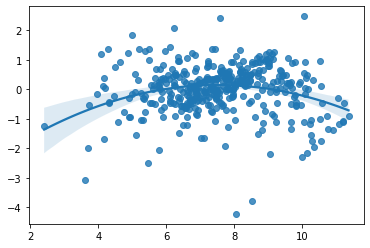

In [138]:
sns.regplot(x = fitted_sqrt,y = resid_sqrt,order = 2)